<a href="https://colab.research.google.com/github/Mrunali95/Thesis/blob/master/Final_GB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import the libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import xgboost as xgb
from xgboost import plot_importance, plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_error

plt.style.use('fivethirtyeight')
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10,6

In [ ]:
## Download data of US Dollar Index

dfUSD = web.DataReader('DX-Y.NYB', data_source='yahoo',start='1990-01-01',end='2020-01-01')

dfUSD.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
1990-01-01,93.309998,93.080002,93.190002,93.209999,0.0,93.209999
1990-01-02,94.309998,93.080002,93.129997,94.290001,0.0,94.290001
1990-01-03,94.519997,94.080002,94.150002,94.419998,0.0,94.419998
1990-01-04,93.879997,92.389999,93.720001,92.519997,0.0,92.519997
1990-01-05,93.419998,92.550003,93.339996,92.849998,0.0,92.849998


In [ ]:
## download data of NASDAQ index

dfnasdaq = web.DataReader('^IXIC', data_source='yahoo',start='1990-01-01',end='2020-01-01')

dfnasdaq.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
1990-01-02,459.299988,452.700012,452.899994,459.299988,110720000,459.299988
1990-01-03,461.600006,460.000000,461.100006,460.899994,152660000,460.899994
1990-01-04,460.799988,456.899994,460.399994,459.399994,147950000,459.399994
1990-01-05,459.399994,457.799988,457.899994,458.200012,137230000,458.200012
1990-01-08,458.700012,456.500000,457.100006,458.700012,115500000,458.700012


In [ ]:
## download data of Dow Jones Industrial Average index

dfdaia = web.DataReader('^DJI', data_source='yahoo',start='1990-01-01',end='2020-01-01')

dfdaia.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
1990-01-02,2811.649902,2732.510010,2748.719971,2810.149902,20680000,2810.149902
1990-01-03,2834.040039,2786.260010,2814.199951,2809.729980,23620000,2809.729980
1990-01-04,2821.459961,2766.419922,2804.389893,2796.080078,24370000,2796.080078
1990-01-05,2810.149902,2758.110107,2786.899902,2773.250000,20290000,2773.250000
1990-01-08,2803.969971,2753.409912,2761.729980,2794.370117,16610000,2794.370117


In [ ]:
## download data of S&P 500 index

dfsp = web.DataReader('^GSPC', data_source='yahoo',start='1990-01-01',end='2020-01-01')

dfsp.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
1990-01-02,359.690002,351.980011,353.399994,359.690002,162070000,359.690002
1990-01-03,360.589996,357.890015,359.690002,358.760010,192330000,358.760010
1990-01-04,358.760010,352.890015,358.760010,355.670013,177000000,355.670013
1990-01-05,355.670013,351.350006,355.670013,352.200012,158530000,352.200012
1990-01-08,354.239990,350.540009,352.200012,353.790009,140110000,353.790009


In [ ]:
## download data of NYSE index

dfnyse = web.DataReader('^NYA', data_source='yahoo',start='1990-01-01',end='2020-01-01')

dfnyse.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
1990-01-02,2093.600098,2093.600098,2093.600098,2093.600098,0,2093.600098
1990-01-03,2091.479980,2091.479980,2091.479980,2091.479980,0,2091.479980
1990-01-04,2075.520020,2075.520020,2075.520020,2075.520020,0,2075.520020
1990-01-05,2058.070068,2058.070068,2058.070068,2058.070068,0,2058.070068
1990-01-08,2065.370117,2065.370117,2065.370117,2065.370117,0,2065.370117


In [ ]:
newdfUSD = dfUSD[(dfUSD.index).isin(dfnasdaq.index)]


In [ ]:
absent = dfdaia[~(dfdaia.index).isin(newdfUSD.index)]

In [ ]:
newdfnasdaq = dfnasdaq[~(dfnasdaq.index).isin(absent.index)]
newdfdaia = dfdaia[~(dfdaia.index).isin(absent.index)]
newdfnyse = dfnyse[~(dfnyse.index).isin(absent.index)]
newdfsp = dfsp[~(dfsp.index).isin(absent.index)]

In [ ]:
finaldata = pd.DataFrame(columns=['USD','NASDAQ','DJAI','NYSE','S&P'])

finaldata['USD'] = newdfUSD['Close']
finaldata['NASDAQ'] = newdfnasdaq['Close']
finaldata['DJAI'] = newdfdaia['Close']
finaldata['NYSE'] = newdfnyse['Close']
finaldata['S&P'] = newdfsp['Close']

finaldata.head()

,USD,NASDAQ,DJAI,NYSE,S&P
Date,,,,,
1990-01-02,94.290001,459.299988,2810.149902,2093.600098,359.690002
1990-01-03,94.419998,460.899994,2809.729980,2091.479980,358.760010
1990-01-04,92.519997,459.399994,2796.080078,2075.520020,355.670013
1990-01-05,92.849998,458.200012,2773.250000,2058.070068,352.200012
1990-01-08,92.050003,458.700012,2794.370117,2065.370117,353.790009


In [ ]:
from sklearn.preprocessing import MinMaxScaler

uscaler = MinMaxScaler(feature_range=(0, 1))
unorm = uscaler.fit_transform(np.array(finaldata['USD']).reshape(-1,1))

nqscaler = MinMaxScaler(feature_range=(0, 1))
nqnorm = nqscaler.fit_transform(np.array(finaldata['NASDAQ']).reshape(-1,1))

dscaler = MinMaxScaler(feature_range=(0, 1))
dnorm = dscaler.fit_transform(np.array(finaldata['DJAI']).reshape(-1,1))

nyscaler = MinMaxScaler(feature_range=(0, 1))
nynorm = nyscaler.fit_transform(np.array(finaldata['NYSE']).reshape(-1,1))

spscaler = MinMaxScaler(feature_range=(0, 1))
spnorm = spscaler.fit_transform(np.array(finaldata['S&P']).reshape(-1,1))

In [ ]:
normdata = pd.DataFrame(columns=['USD','NASDAQ','DJAI','NYSE','S&P'])

normdata['USD'] = unorm.flatten()
normdata['NASDAQ'] = nqnorm.flatten()
normdata['DJAI'] = dnorm.flatten()
normdata['NYSE'] = nynorm.flatten()
normdata['S&P'] = spnorm.flatten()

normdata.index = finaldata.index

In [ ]:
for i in normdata.columns:
  from statsmodels.tsa.stattools import adfuller
  #Perform Dickey-Fuller test:
  print('Results of Dickey-Fuller Test: ', i)
  dftest = adfuller(normdata[i], autolag='AIC')
  dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
  for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
  print(dfoutput)
  print("-------------------------------------------")

  ## Applying time shifting, we subtract every the point by the one that preceded it to make data stationary
exog = pd.DataFrame(columns=['USD','NASDAQ','DJAI','NYSE','S&P'])
for i in normdata.columns:
  df = normdata[i] - normdata[i].shift()
  df.dropna(inplace=True)
  exog[i] = df
print("*******************************************************************")

for i in exog.columns:
  from statsmodels.tsa.stattools import adfuller
  #Perform Dickey-Fuller test:
  print('Results of Dickey-Fuller Test:')
  dftest = adfuller(exog[i], autolag='AIC')
  dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
  for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
  print(dfoutput)
  print("-------------------------------------------")

Results of Dickey-Fuller Test:  USD
Test Statistic                   -1.974825
p-value                           0.297719
#Lags Used                        0.000000
Number of Observations Used    7525.000000
Critical Value (1%)              -3.431219
Critical Value (5%)              -2.861924
Critical Value (10%)             -2.566974
dtype: float64
-------------------------------------------
Results of Dickey-Fuller Test:  NASDAQ
Test Statistic                    1.703705
p-value                           0.998138
#Lags Used                       30.000000
Number of Observations Used    7495.000000
Critical Value (1%)              -3.431223
Critical Value (5%)              -2.861926
Critical Value (10%)             -2.566975
dtype: float64
-------------------------------------------
Results of Dickey-Fuller Test:  DJAI
Test Statistic                    1.435696
p-value                           0.997270
#Lags Used                       19.000000
Number of Observations Used    7506.000

In [ ]:
train_data = exog[:int(len(exog)*0.8)]
test_data = exog[int(len(exog)*0.8):]

In [ ]:
def create_features(df, label=None):
    """
    Creates time series features from datetime index
    """
    df['Date'] = df.index
    df['dayofweek'] = df['Date'].dt.dayofweek
    df['quarter'] = df['Date'].dt.quarter
    df['month'] = df['Date'].dt.month
    df['year'] = df['Date'].dt.year
    df['dayofyear'] = df['Date'].dt.dayofyear
    df['dayofmonth'] = df['Date'].dt.day
    df['weekofyear'] = df['Date'].dt.weekofyear
    
    return df

In [ ]:
data = create_features(train_data)
X = data.drop(["USD","Date"],axis=1)
Y = data['USD']

X_train= X[0:int(len(X)*0.85)]
X_val = X[int(len(X)*0.85):]

y_train= Y[0:int(len(Y)*0.85)]
y_val = Y[int(len(Y)*0.85):]

In [ ]:
tdata = create_features(test_data)

X_test = tdata.drop(['USD','Date'], axis=1)
y_test = tdata['USD']

In [ ]:
from xgboost import XGBRegressor
model = XGBRegressor(
    max_depth=50,
    n_estimators=1000,
    min_child_weight=500, 
    colsample_bytree=0.8, 
    subsample=0.8, 
    eta=0.3, seed=48)
model.fit(
    X_train, 
    y_train, 
    eval_metric="rmse",
    eval_set=[(X_train, y_train),(X_val,y_val)], 
    verbose=True)

[13:41:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:0.450166	validation_1-rmse:0.450183
[1]	validation_0-rmse:0.405187	validation_1-rmse:0.4052
[2]	validation_0-rmse:0.364707	validation_1-rmse:0.364716
[3]	validation_0-rmse:0.328277	validation_1-rmse:0.32828
[4]	validation_0-rmse:0.295488	validation_1-rmse:0.295485
[5]	validation_0-rmse:0.265981	validation_1-rmse:0.26597
[6]	validation_0-rmse:0.239441	validation_1-rmse:0.239422
[7]	validation_0-rmse:0.215547	validation_1-rmse:0.215521
[8]	validation_0-rmse:0.194041	validation_1-rmse:0.194005
[9]	validation_0-rmse:0.174697	validation_1-rmse:0.174651
[10]	validation_0-rmse:0.157295	validation_1-rmse:0.157237
[11]	validation_0-rmse:0.141644	validation_1-rmse:0.141572
[12]	validation_0-rmse:0.127559	validation_1-rmse:0.127473
[13]	validation_0-rmse:0.114887	validation_1-rmse:0.114785
[14]	validation_0-rmse:0.103502	validation_1-rmse:0.103382
[1

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, eta=0.3, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=50, min_child_weight=500, missing=None,
             n_estimators=1000, n_jobs=1, nthread=None, objective='reg:linear',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=48, silent=None, subsample=0.8, verbosity=1)

In [ ]:
pred = model.predict(X_test)

pred = pd.Series(pred, index=test_data.index)
#pred[0] = pred[0]+0.17
pcs = (pred.cumsum())
pred_cs = pd.Series(test_data.iloc[0], index=test_data.index)
pred_cs = pred_cs.add(pcs, fill_value=0)
pred_cs = pred_cs + 0.17

p=np.array(pred_cs).reshape(-1,1)
pt = uscaler.inverse_transform(p)
pt = np.array(pt).flatten()
pecs = pd.Series(pt, index=y_test.index)


In [ ]:
y_test1 = pd.Series(y_test)
#y_test1[0] = y_test1[0] +0.17
ycs = (y_test1.cumsum())

tcs = pd.Series(test_data.iloc[0], index=test_data.index)
tcs = tcs.add(ycs, fill_value=0)
tcs = tcs + 0.17

y=np.array(tcs).reshape(-1,1)
yt = uscaler.inverse_transform(y)
yt = np.array(yt).flatten()
yecs = pd.Series(yt, index=y_test.index)


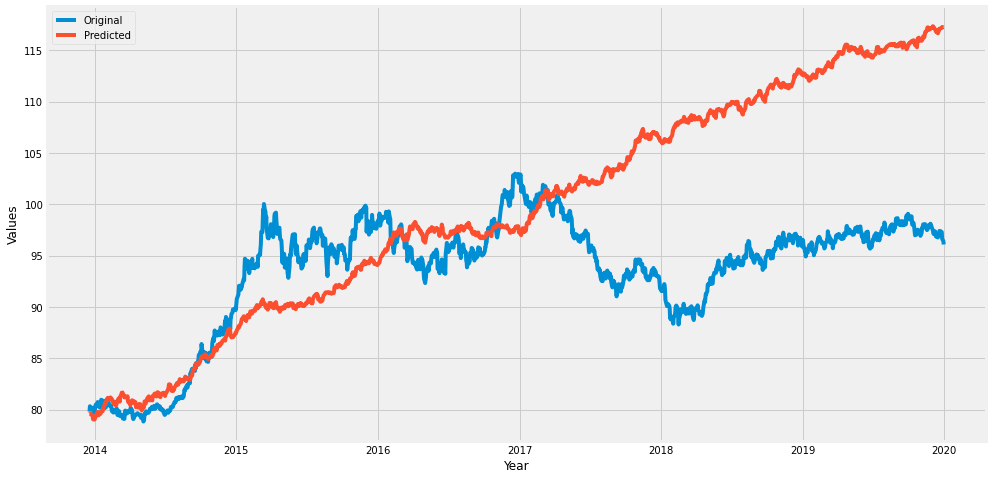

In [ ]:
plt.figure(figsize=(15,8))
plt.plot(yecs)
plt.plot(pecs)
plt.xlabel('Year')
plt.ylabel('Values')
plt.legend(['Original','Predicted'])

In [ ]:
from math import sqrt
from sklearn.metrics import mean_squared_error, mean_absolute_error

rmse = math.sqrt(mean_squared_error(yecs, pecs))
print('Root Mean Squared Error: %.3f'% rmse)
mae = mean_absolute_error(yecs, pecs)
print('Mean Absolute Error: %.3f'% mae)
mape = np.mean(np.abs(pecs - yecs)/np.abs(yecs))
print('Mean Absolute Percentage Error: %.3f'% (mape))

Root Mean Squared Error: 10.686
Mean Absolute Error: 8.158
Mean Absolute Percentage Error: 0.086


[20:05:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:05:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:05:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:05:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:05:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:05:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:06:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:06:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

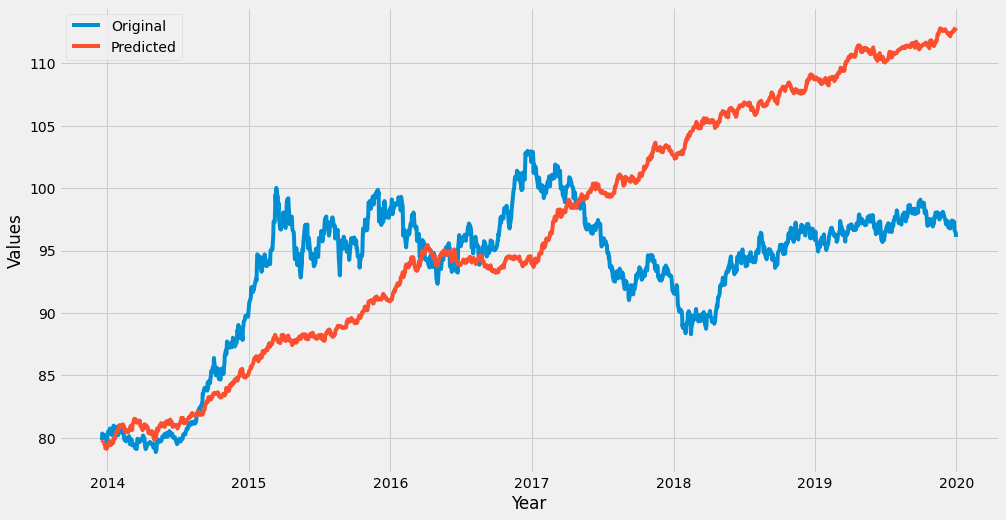

In [ ]:
#default tuning

from xgboost import XGBRegressor
import warnings
warnings.filterwarnings("ignore")

gbc = XGBRegressor()

parameters = {
    "n_estimators":[1000, 800, 1200],
    "max_depth":[50, 60, 40],
    "min_child_weight":[500, 350, 600],
    "colsample_bytree":[0.8],
    "subsample":[0.8],
    "eta":[0.3],
    "seed":[48]
}
from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(gbc, parameters)
cv.fit(X_train,y_train, eval_metric="rmse",
    eval_set=[(X_train, y_train),(X_val,y_val)], 
    verbose=False)

p = cv.predict(X_test)
pred = pd.Series(p, index=test_data.index)
pcs = (pred.cumsum())
pred_cs = pd.Series(test_data.iloc[0], index=test_data.index)
pred_cs = pred_cs.add(pcs, fill_value=0)
pred_cs = pred_cs + 0.17
p=np.array(pred_cs).reshape(-1,1)
pt = uscaler.inverse_transform(p)
pt = np.array(pt).flatten()
p1 = pd.Series(pt, index=y_test.index)

plt.figure(figsize=(15,8))
plt.plot(yecs)
plt.plot(p1)
plt.xlabel('Year')
plt.ylabel('Values')
plt.legend(['Original','Predicted'])

from math import sqrt
from sklearn.metrics import mean_squared_error, mean_absolute_error

rmse = math.sqrt(mean_squared_error(yecs, p1))
print('Root Mean Squared Error: %.3f'% rmse)
mae = mean_absolute_error(yecs, p1)
print('Mean Absolute Error: %.3f'% mae)
mape = np.mean(np.abs(p1 - yecs)/np.abs(yecs))
print('Mean Absolute Percentage Error: %.3f'% (mape))

[13:47:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:47:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:47:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:47:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Root Mean Squared Error: 10.686
Mean Absolute Error: 8.158
Mean Absolute Percentage Error: 0.086


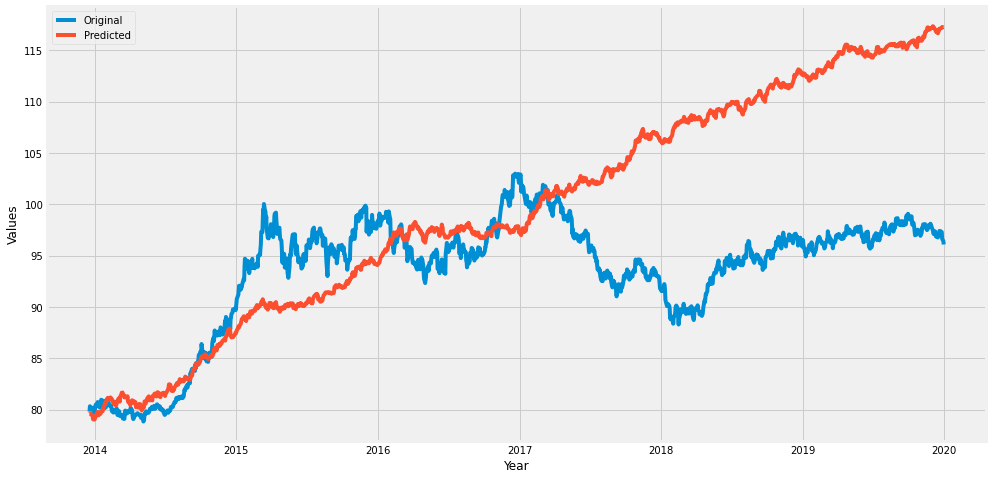

In [ ]:
#default with CV=3

from xgboost import XGBRegressor
import warnings
warnings.filterwarnings("ignore")

gbc = XGBRegressor()

parameters = {
    "n_estimators":[1000],
    "max_depth":[50],
    "min_child_weight":[500],
    "colsample_bytree":[0.8],
    "subsample":[0.8],
    "eta":[0.3],
    "seed":[48]
}
from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(gbc, parameters ,cv=3)
cv.fit(X_train,y_train, eval_metric="rmse",
    eval_set=[(X_train, y_train),(X_val,y_val)], 
    verbose=False)

p = cv.predict(X_test)
pred = pd.Series(p, index=test_data.index)
pcs = (pred.cumsum())
pred_cs = pd.Series(test_data.iloc[0], index=test_data.index)
pred_cs = pred_cs.add(pcs, fill_value=0)
pred_cs = pred_cs + 0.17
p=np.array(pred_cs).reshape(-1,1)
pt = uscaler.inverse_transform(p)
pt = np.array(pt).flatten()
p1 = pd.Series(pt, index=y_test.index)

plt.figure(figsize=(15,8))
plt.plot(yecs)
plt.plot(p1)
plt.xlabel('Year')
plt.ylabel('Values')
plt.legend(['Original','Predicted'])

from math import sqrt
from sklearn.metrics import mean_squared_error, mean_absolute_error

rmse = math.sqrt(mean_squared_error(yecs, p1))
print('Root Mean Squared Error: %.3f'% rmse)
mae = mean_absolute_error(yecs, p1)
print('Mean Absolute Error: %.3f'% mae)
mape = np.mean(np.abs(p1 - yecs)/np.abs(yecs))
print('Mean Absolute Percentage Error: %.3f'% (mape))

In [ ]:
cv.best_estimator_.feature_importances_

array([0.09177358, 0.0981535 , 0.11427224, 0.09564907, 0.09202806,
       0.0691348 , 0.07343628, 0.12346201, 0.07881628, 0.07750919,
       0.08576505], dtype=float32)

In [ ]:
_ = plot_importance(model, height=0.9)

NameError: ignored